In [1]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
stores_train = pd.read_csv("data/stores_train.csv")

In [3]:
stores_train.dtypes

store_id                object
year                     int64
store_name              object
plaace_hierarchy_id     object
sales_channel_name      object
grunnkrets_id            int64
address                 object
lat                    float64
lon                    float64
chain_name              object
mall_name               object
revenue                float64
dtype: object

In [4]:
train_num = stores_train.select_dtypes(include=[np.float64, np.int64])

In [5]:
train_num.shape

(12859, 5)

In [42]:
train_num["log_revenues"] = train_num["revenue"].apply(lambda x: np.log10(x+0.1))

/var/folders/0n/8hp9d_rj4_9d8vgrqztmqhf40000gn/T/ipykernel_35582/2539027141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num["log_revenues"] = train_num["revenue"].apply(lambda x: np.log10(x+0.1))


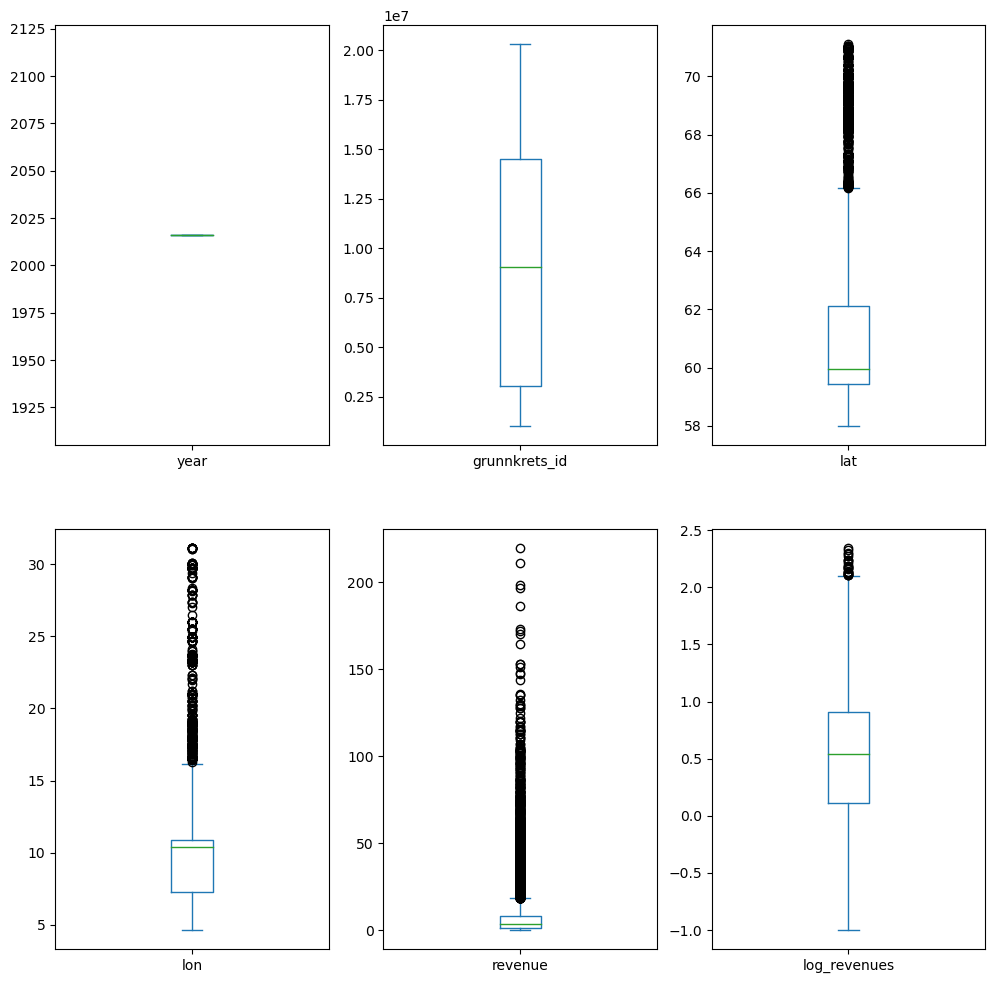

In [43]:
train_num.plot(kind="box", subplots=True, layout=(2,3), figsize=(12,12));

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from utils import CustomTransformer

In [45]:
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler(with_mean=True, with_std=True))]
)

In [46]:
train_num_sd = numerical_transformer.fit_transform(train_num)

In [47]:
train_num_sd = pd.DataFrame(train_num_sd, index=train_num.index, columns=train_num.columns)

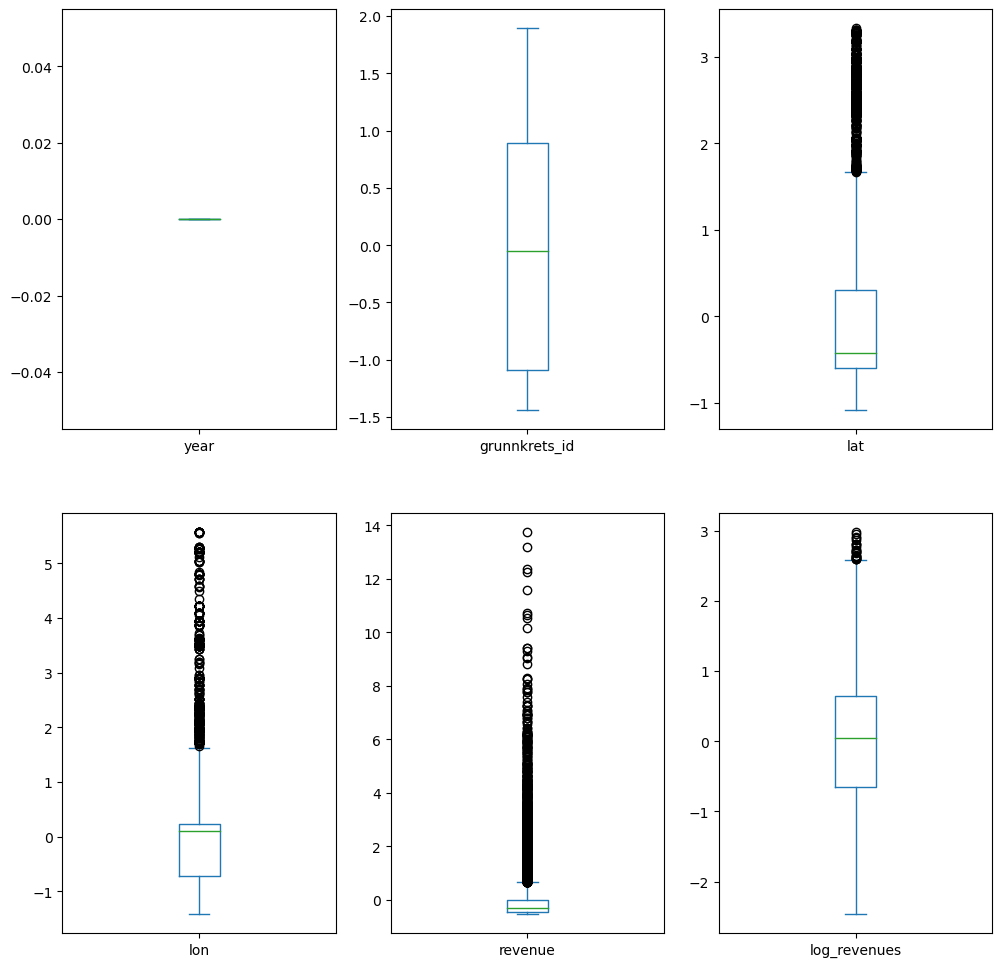

In [48]:
train_num_sd.plot(kind="box", subplots=True, layout=(2,3), figsize=(12,12));

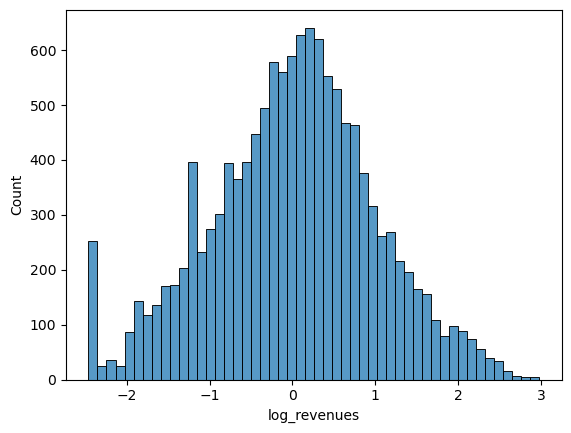

In [49]:
sns.histplot(train_num_sd.log_revenues);

In [26]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(train_num.revenue)
print("# of utliers from Z-scores method: ", len(sample_outliers))

# of utliers from Z-scores method:  328


In [51]:
stores_test = pd.read_csv("data/stores_test.csv")

In [52]:
count = 0
train_ids = set(list(stores_train.grunnkrets_id))
test_ids = list(stores_test.grunnkrets_id)
for id in train_ids:
    if id not in train_ids:
        count += 1
print(count)

0
